In [ ]:
import pickle as pickle
import os
import random
import pandas as pd
import torch
import sklearn
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, Trainer, TrainingArguments, RobertaConfig, RobertaTokenizer, RobertaForSequenceClassification, BertTokenizer
from metrics import *
from load_data import *

# Data

In [37]:
train_dataset = load_data("../dataset/train/train.csv")

In [10]:
train_label = label_to_num(train_dataset['label'].values)

In [50]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

indices = np.arange(len(train_dataset))

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [52]:
skf.get_n_splits(indices)

5

In [59]:
skf_idx_5fold = tuple(skf.split(indices, train_label))

In [87]:
pwd

'/opt/ml/klue_re'

In [88]:
with open('skf_idx_5fold_numpy.pkl', 'wb') as f:
    pickle.dumps(skf_idx_5fold)

In [66]:
import seaborn as sns

/opt/conda/envs/basic/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

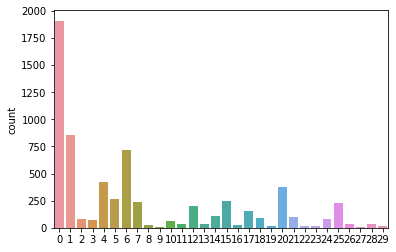

In [69]:
sns.countplot(pd.Series(train_label)[skf_idx_5fold[0][1]])